In [1]:
import pandas as pd
import transport
import matplotlib.pyplot as plt

In [2]:
# считываем корреспонденции и дополняем их информацией о кластерах остановок
df = transport.preprocessing.read_corr('corr.csv', nrows = 30000).drop(columns = ['id_stop_start', 'id_stop_end'])
# проводим первичную фильтрацию
df = transport.preprocessing.visit_threshold(df, threshold = 7)

df.head()

,card_number,corr_number,start_time,end_time,ddate,card_type_id,card_type_name,cluster_start,stop_name_start,longitude_start,latitude_start,cluster_end,stop_name_end,longitude_end,latitude_end
0,1000010934,1,03.10.2017 06:01:00,03.10.2017 06:10:00,03.10.2017 00:00:00,49,ПБ единый льготный на БСК,185,Пр.Ветеранов-2,30.250084,59.842042,184,Ленинский пр.-1,30.268385,59.851683
1,1000010934,2,03.10.2017 21:41:00,03.10.2017 21:50:00,03.10.2017 00:00:00,49,ПБ единый льготный на БСК,184,Ленинский пр.-1,30.268385,59.851683,185,Пр.Ветеранов-1,30.253984,59.841604
2,1000010934,3,04.10.2017 05:58:00,04.10.2017 06:12:00,04.10.2017 00:00:00,49,ПБ единый льготный на БСК,132,УЛ. ТАНКИСТА ХРУСТИЦКОГО,30.258155,59.834026,184,Ленинский пр.-1,30.268385,59.851683
3,1000010934,4,04.10.2017 21:49:00,04.10.2017 22:14:00,04.10.2017 00:00:00,49,ПБ единый льготный на БСК,184,Ленинский пр.-1,30.268385,59.851683,860,ПР. НАРОДНОГО ОПОЛЧЕНИЯ. УГ. УЛ. СОЛДАТА КОРЗУНА,30.223861,59.826000
4,1000010934,5,05.10.2017 12:27:00,05.10.2017 13:23:00,05.10.2017 00:00:00,49,ПБ единый льготный на БСК,185,Пр.Ветеранов-1,30.253984,59.841604,205,Улица Дыбенко,30.483049,59.907362


In [3]:
# определяем местоположения дома и работы
df = pd.merge(df, transport.poi.get_poi(df), how = 'inner', on = 'card_number')
# оставляем только те дни, когда пассажир был на работе
df = transport.poi.filter_workdays(df)
# проводим вторичную фильтрацию
df = transport.preprocessing.visit_threshold(df, threshold = 7)

df.head()

100.0% done in 0.05 mins, remaining time: 0.0 minss

,card_number,corr_number,start_time,end_time,ddate,card_type_id,card_type_name,cluster_start,stop_name_start,longitude_start,latitude_start,cluster_end,stop_name_end,longitude_end,latitude_end,work,home
39,1000097558,1,02.10.2017 06:49:00,02.10.2017 07:39:00,02.10.2017 00:00:00,49,ПБ единый льготный на БСК,207,Чкаловская,30.292046,59.960987,205,Улица Дыбенко,30.483049,59.907362,205,207
40,1000097558,2,02.10.2017 17:17:00,02.10.2017 18:07:00,02.10.2017 00:00:00,49,ПБ единый льготный на БСК,205,Улица Дыбенко,30.483049,59.907362,207,Чкаловская,30.292046,59.960987,205,207
41,1000097558,3,03.10.2017 06:48:00,03.10.2017 07:38:00,03.10.2017 00:00:00,49,ПБ единый льготный на БСК,207,Чкаловская,30.292046,59.960987,205,Улица Дыбенко,30.483049,59.907362,205,207
42,1000097558,4,03.10.2017 17:21:00,03.10.2017 18:11:00,03.10.2017 00:00:00,49,ПБ единый льготный на БСК,205,Улица Дыбенко,30.483049,59.907362,207,Чкаловская,30.292046,59.960987,205,207
43,1000097558,5,04.10.2017 06:48:00,04.10.2017 07:38:00,04.10.2017 00:00:00,49,ПБ единый льготный на БСК,207,Чкаловская,30.292046,59.960987,205,Улица Дыбенко,30.483049,59.907362,205,207


In [4]:
# представляем пассажиров в виде профилей
df = transport.profile.transform(df)

df.head()

100.0% done in 0.07 mins, remaining time: 0.0 minss

week             1                             ...      2                    \
day         monday                             ... sunday                     
hour            0  1  2  3  4  5  6  7  8  9   ...     14 15 16 17 18 19 20   
card_number                                    ...                            
1000097558       0  0  0  0  0  0  1  0  0  0  ...      0  0  0  0  0  0  0   
1000098726       0  0  0  0  0  0  0  0  0  0  ...      0  0  0  0  0  0  0   
1000099318       0  0  0  0  0  0  0  1  0  0  ...      0  0  0  0  0  0  0   
1000100086       0  0  0  0  0  0  0  0  0  0  ...      0  0  0  0  0  0  0   
1000100118       0  0  0  0  0  0  0  0  1  0  ...      0  0  0  0  0  0  0   

week                  
day                   
hour        21 22 23  
card_number           
1000097558   0  0  0  
1000098726   0  0  0  
1000099318   0  0  0  
1000100086   1  0  0  
1000100118   0  0  0  

[5 rows x 336 columns]

In [5]:
# вычисляем расписания и соответствующие им паттерны
df = transport.profile.extract_patterns(df)
df.head()

week             1                             ...      2                    \
day         monday                             ... sunday                     
hour             0  1  2  3  4  5  6  7  8  9  ...     16 17 18 19 20 21 22   
card_number                                    ...                            
1000097558       0  0  0  0  0  0  1  0  0  0  ...      0  0  0  0  0  0  0   
1000098726       0  0  0  0  0  0  0  0  0  0  ...      0  0  0  0  0  0  0   
1000099318       0  0  0  0  0  0  0  1  0  0  ...      0  0  0  0  0  0  0   
1000100086       0  0  0  0  0  0  0  0  0  0  ...      0  0  0  0  0  1  0   
1000100118       0  0  0  0  0  0  0  0  1  0  ...      0  0  0  0  0  0  0   

week                  schedule         pattern  
day                                             
hour        23                                  
card_number                                     
1000097558   0  WWWWWHHWWWWWHH         WWWWWHH  
1000098726   0  WWWWWWHWWWWWHH         WWWWWWH  
1000099318   0  WWWHWHHWWWWWWH  WWWHWHHWWWWWWH  
1000100086   0  WWHHHHWWHHWWWW  WWHHHHWWHHWWWW  
1000100118   0  WWWWWHHWWWWWHH         WWWWWHH  

[5 rows x 338 columns]

In [6]:
# убираем пассажиров с длиной паттерна > 7, т.к они нерегулярны
df = transport.profile.filter_by_pattern_len(df, pattern_len = 7)
df.head()

C:\Users\user\Miniconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (3 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


week             1                             ...      2                    \
day         monday                             ... sunday                     
hour             0  1  2  3  4  5  6  7  8  9  ...     16 17 18 19 20 21 22   
card_number                                    ...                            
1000097558       0  0  0  0  0  0  1  0  0  0  ...      0  0  0  0  0  0  0   
1000098726       0  0  0  0  0  0  0  0  0  0  ...      0  0  0  0  0  0  0   
1000100118       0  0  0  0  0  0  0  0  1  0  ...      0  0  0  0  0  0  0   
1000100790       0  0  0  0  0  0  0  0  0  1  ...      0  0  0  0  0  0  0   
1000101750       0  0  0  0  0  0  0  1  0  0  ...      0  0  0  0  0  0  0   

week                  schedule  pattern  
day                                      
hour        23                           
card_number                              
1000097558   0  WWWWWHHWWWWWHH  WWWWWHH  
1000098726   0  WWWWWWHWWWWWHH  WWWWWWH  
1000100118   0  WWWWWHHWWWWWHH  WWWWWHH  
1000100790   0  WWWHWHHWWWWWHH  WWWWWHH  
1000101750   0  WWWWWHHWWWWWHH  WWWWWHH  

[5 rows x 338 columns]

In [7]:
# сжимаем профиль относительно паттерна 
df = transport.profile.compress(df)['WWWWWHH']

df.head()

day          1                             ...  7                          \
hour         0  1  2  3  4  5  6  7  8  9  ... 15 16 17 18 19 20 21 22 23   
card_number                                ...                              
1000097558   0  0  0  0  0  0  2  0  0  0  ...  0  0  0  0  0  0  0  0  0   
1000100118   0  0  0  0  0  0  0  0  1  1  ...  0  0  0  0  0  0  0  0  0   
1000100790   0  0  0  0  0  0  0  0  0  2  ...  0  0  0  0  0  0  0  0  0   
1000101750   0  0  0  0  0  0  0  2  0  0  ...  0  0  0  0  0  0  0  0  0   
1000102886   0  0  0  0  0  0  0  0  0  2  ...  0  0  0  0  0  0  0  0  0   

day          pattern  
hour                  
card_number           
1000097558   WWWWWHH  
1000100118   WWWWWHH  
1000100790   WWWWWHH  
1000101750   WWWWWHH  
1000102886   WWWWWHH  

[5 rows x 169 columns]

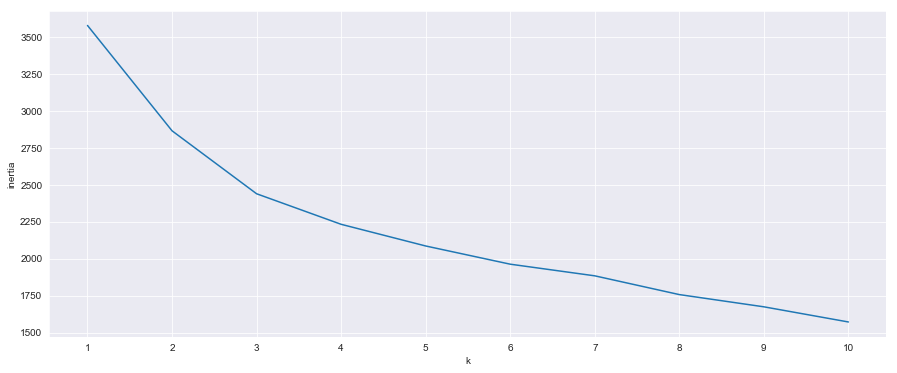

In [8]:
# изучаем график локтя
transport.clustering.draw_elbow(df)

In [9]:
# кластеризуем
df = transport.clustering.cluster(df, n_clusters = 7)
dsz = df.groupby('cluster').size().to_frame('size').sort_values('size', ascending = False)

df.head()

day          1                             ...  7                       \
hour         0  1  2  3  4  5  6  7  8  9  ... 16 17 18 19 20 21 22 23   
card_number                                ...                           
1000097558   0  0  0  0  0  0  2  0  0  0  ...  0  0  0  0  0  0  0  0   
1000100118   0  0  0  0  0  0  0  0  1  1  ...  0  0  0  0  0  0  0  0   
1000100790   0  0  0  0  0  0  0  0  0  2  ...  0  0  0  0  0  0  0  0   
1000101750   0  0  0  0  0  0  0  2  0  0  ...  0  0  0  0  0  0  0  0   
1000102886   0  0  0  0  0  0  0  0  0  2  ...  0  0  0  0  0  0  0  0   

day          pattern cluster  
hour                          
card_number                   
1000097558   WWWWWHH       0  
1000100118   WWWWWHH       1  
1000100790   WWWWWHH       3  
1000101750   WWWWWHH       2  
1000102886   WWWWWHH       3  

[5 rows x 170 columns]

In [10]:
# вычисляем статистику для тепловых карт
df = transport.clustering.cluster_stats(df)

df.head()

day        1                                                                   \
hour       0    1    2    3    4         5    6         7         8         9   
cluster                                                                         
0        0.0  0.0  0.0  0.0  0.0  0.000000  1.0  0.222222  0.000000  0.000000   
1        0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.080000  1.000000  0.080000   
2        0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.916667  0.083333  0.000000   
3        0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  0.052632  1.000000   
4        0.0  0.0  0.0  0.0  0.0  0.111111  0.0  0.111111  0.611111  0.111111   

day      ...    7                                                     pattern  
hour     ...   15   16   17        18    19        20   21   22   23           
cluster  ...                                                                   
0        ...  0.0  0.0  0.0  0.000000  0.00  0.000000  0.0  0.0  0.0  WWWWWHH  
1        ...  0.0  0.0  0.0  0.040000  0.04  0.000000  0.0  0.0  0.0  WWWWWHH  
2        ...  0.0  0.0  0.0  0.041667  0.00  0.041667  0.0  0.0  0.0  WWWWWHH  
3        ...  0.0  0.0  0.0  0.052632  0.00  0.000000  0.0  0.0  0.0  WWWWWHH  
4        ...  0.0  0.0  0.0  0.000000  0.00  0.000000  0.0  0.0  0.0  WWWWWHH  

[5 rows x 169 columns]

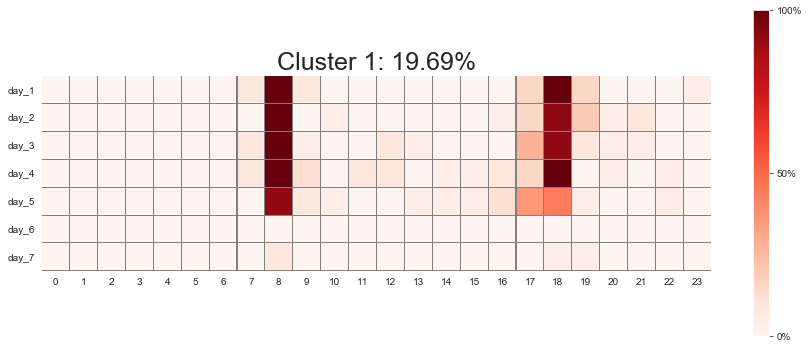

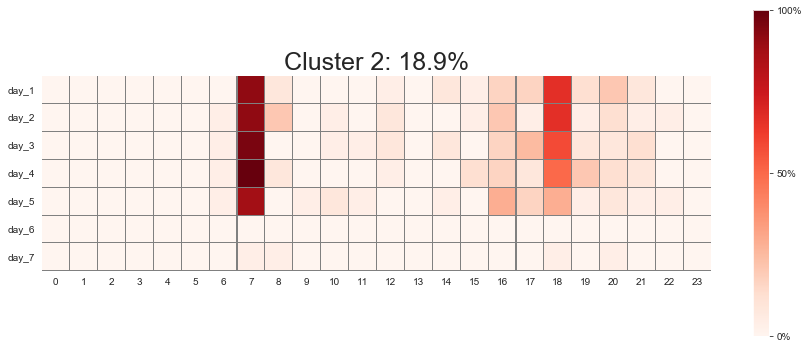

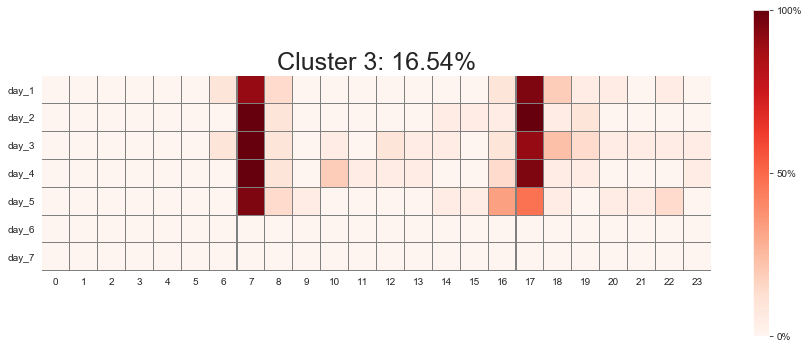

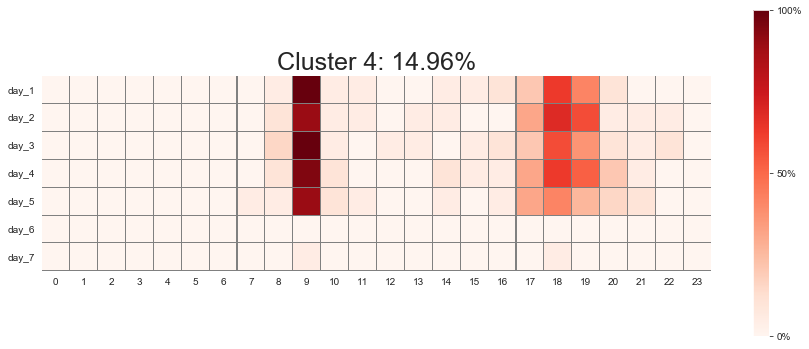

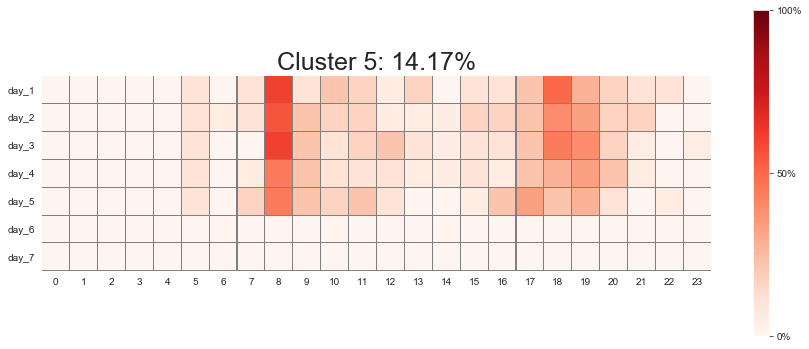

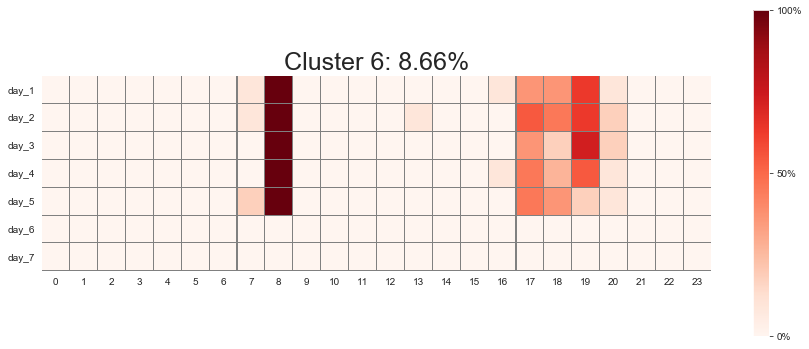

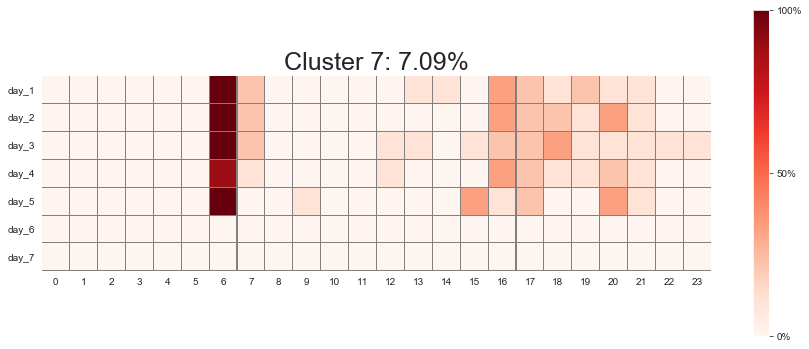

In [11]:
for j, i in enumerate(dsz.index):
    transport.visualization.heatmap(df.loc[i], legend = True)
    plt.title(
        'Cluster {}: {}%'.format(j + 1, round(100 * dsz.loc[i]['size'] / sum(dsz['size']), 2)),
        fontdict = {'fontsize' : 25}
    )